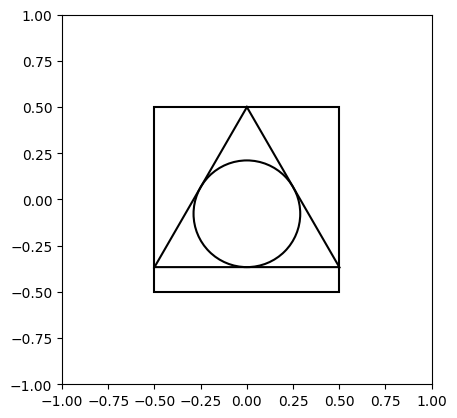

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

def new_side_sqr(old_side):
    return old_side / math.sqrt(6)

def square(side_sqr, center):
    x, y = center
    vertices = (x - side_sqr / 2, y - side_sqr / 2)
    return vertices

def draw_square(ax, side_sqr, vertices, color):
    sqr = patches.Rectangle(vertices, side_sqr, side_sqr, edgecolor=color, facecolor='none', linewidth=1.5)
    ax.add_patch(sqr)

def triangle_in_square(side_sqr, center):
    x, y = center
    height = (math.sqrt(3) * side_sqr) / 2  # высота треугольника
    vertices = (
        (x, y + side_sqr / 2),  # Верхняя вершина
        (x - side_sqr / 2, y + side_sqr / 2 - height),  # Левая нижняя вершина
        (x + side_sqr / 2, y + side_sqr / 2 - height),  # Правая нижняя вершина
    )
    return vertices

def draw_triangle(ax, vertices, color):
    trngl = patches.Polygon(vertices, edgecolor=color, facecolor='none', linewidth=1.5)
    ax.add_patch(trngl)

def circle_in_triangle(side_sqr, center):
    x, y = center
    radius = (side_sqr * math.sqrt(3)) / 6  # Радиус вписанной окружности
    height = (math.sqrt(3) * side_sqr) / 2  # высота треугольника
    circle_center = (x, y + side_sqr / 2 - (2 / 3 * height))
    return (circle_center, radius)

def draw_circle_in_triangle(ax, circle_center, radius, color):
    circle = patches.Circle(circle_center, radius, edgecolor=color, facecolor='none', linewidth=1.5)
    ax.add_patch(circle)

def draw_nested_shapes(ax, side_sqr, layers):
    center = (0, 0)  # Центр всех фигур
    colors = ['black']  # Список цветов
    for i in range(layers):
        color = colors[i % len(colors)]  # Меняем цвет на каждом уровне
        vertices = square(side_sqr, center)
        draw_square(ax, side_sqr, vertices, color)  # Рисуем квадрат
        vertices = triangle_in_square(side_sqr, center)
        draw_triangle(ax, vertices, color)  # Рисуем треугольник
        parameters = circle_in_triangle(side_sqr, center)
        draw_circle_in_triangle(ax, *parameters, color)  # Рисуем круг
        new_side = new_side_sqr(side_sqr)
        side_sqr = new_side
        center = parameters[0]

def main():
    side_sqr = int(input("Введите размер стороны квадрата: "))
    layers = int(input("Введите количество вложений (не более 4): "))

    if layers > 4:
        print("Ошибка: количество вложений не должно превышать 4!")
        return

    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    ax.set_xlim(-side_sqr, side_sqr)
    ax.set_ylim(-side_sqr, side_sqr)

    draw_nested_shapes(ax, side_sqr, layers)
    plt.show()

main()
